In [2]:
from pylab import *

In [35]:
def mi_Euler(ec_EDO , t , x0 , args=[] , delta=0.1):
    # ec_EDO es el sistema a integrar (t,x)
    # t es el intervalo de integracion
    # x0 punto inicial
    tiempos = arange(t[0],t[1]+delta,delta)
    M , N = len(x0) , len(tiempos)
    sol = zeros( (M,N) )
    sol[:,0] = x0
    for i in range(N-1):
        if len(args) == 0:
            sol[:,i+1] = sol[:,i] + delta*ec_EDO(tiempos[i],sol[:,i])
        else:
            sol[:,i+1] = sol[:,i] + delta*ec_EDO(tiempos[i],sol[:,i],args)
    return sol,tiempos

$$
\frac{dy^2}{dt^2} = -y + \cos(\omega t)
$$
con $y(0)=7$ y $y'(0) = 0$. 
Hacemos $u = \frac{dy}{dt}$ y por lo tanto $\frac{du}{dt} = \frac{dy^2}{dt^2} = -y + \cos(\omega t)$. Entonces:

$$
\frac{dy}{dt} = u \\
\frac{du}{dt} = -y + \cos(\omega t) 
$$
con condición inicial $(y,u) = (7,0)$

In [36]:
def ec_dif4(t,y,omega=[1.0]):
    return array([y[1],-y[0]+cos(omega[0]*t)])

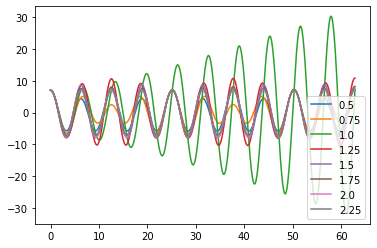

In [47]:
omegas = arange(0.5,2.5,0.25)
for omega_i in omegas:
    sol,t = mi_Euler(ec_dif4,[0,20*pi],[7,0],[omega_i],0.001)
    plot(t,sol[0],label=omega_i)
legend()
show()